<a href="https://colab.research.google.com/github/thrishajaitaram28/Heart-Disease-Prediction-using-Machine-Learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import accuracy_score,roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df1=df.dropna()
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
label_encoder = LabelEncoder()
df1['target'] = label_encoder.fit_transform(df1['target'])


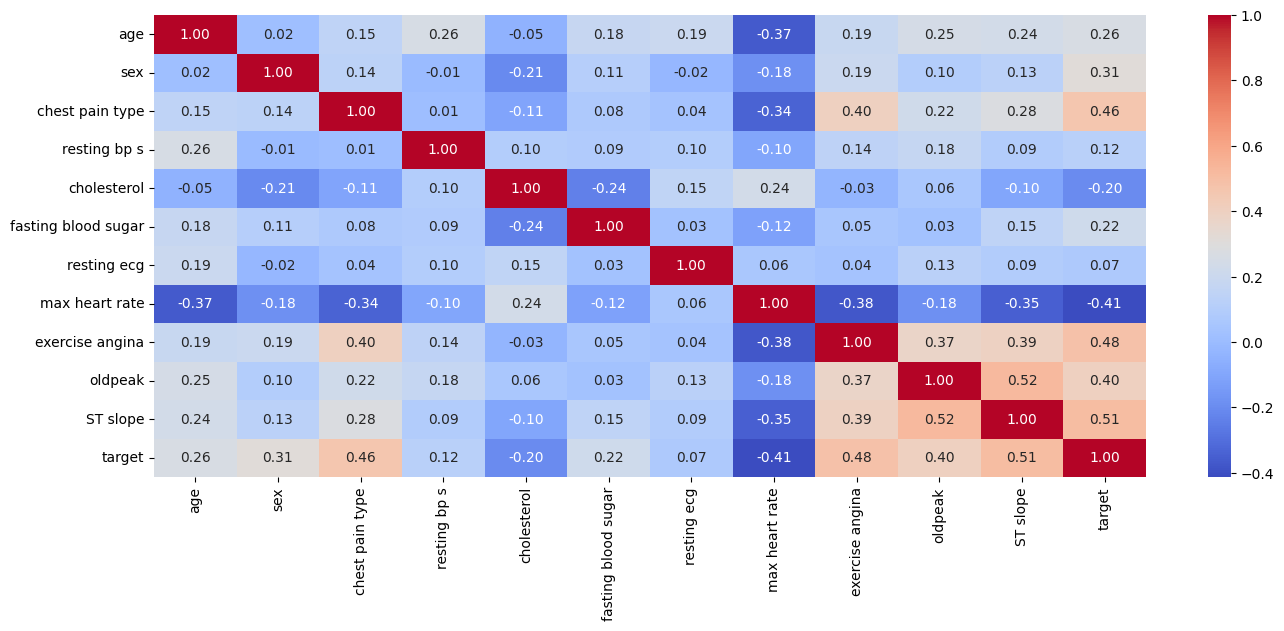

In [ ]:
correlation_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
X = df1.drop('target', axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8319327731092437
                  precision    recall  f1-score   support

   0: No Disease       0.82      0.80      0.81       107
1: Heart Disease       0.84      0.85      0.85       131

        accuracy                           0.83       238
       macro avg       0.83      0.83      0.83       238
    weighted avg       0.83      0.83      0.83       238



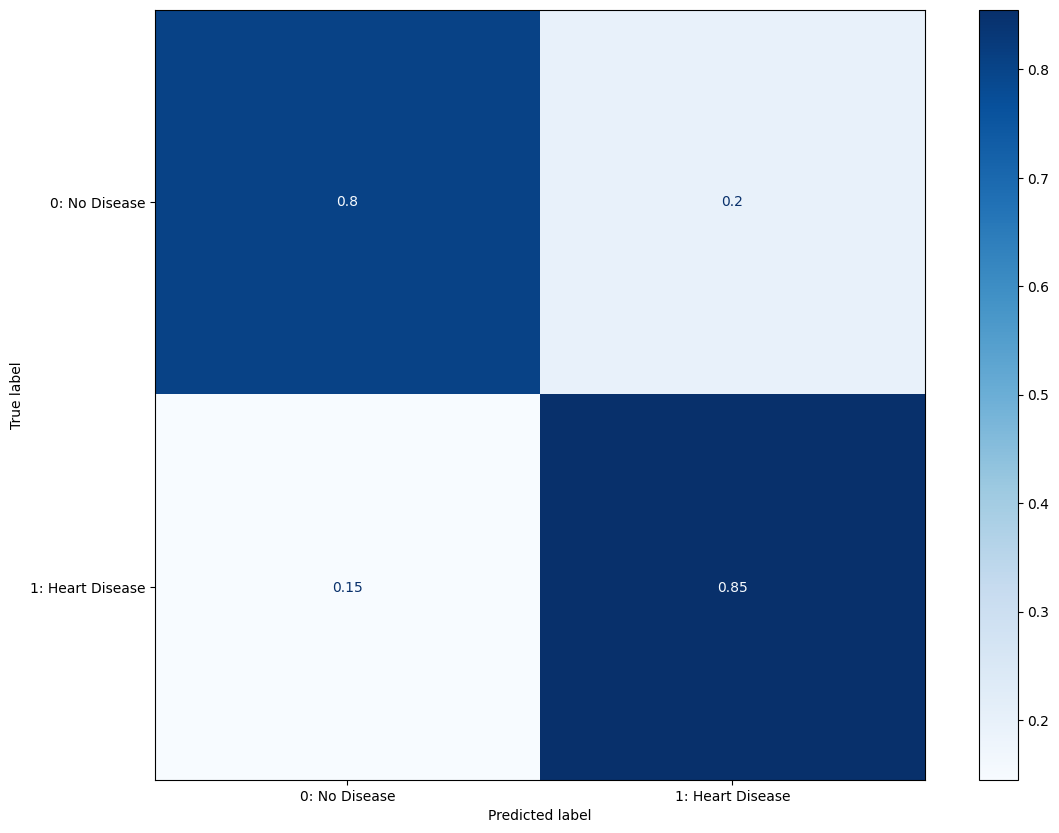

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

lr_prediction=lr.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(lr_prediction,y_test)


target_names = ['0: No Disease', '1: Heart Disease']
print(accuracy)
print(classification_report(y_test,lr_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, lr_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(14,10))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.8571428571428571
                  precision    recall  f1-score   support

   0: No Disease       0.85      0.83      0.84       107
1: Heart Disease       0.86      0.88      0.87       131

        accuracy                           0.86       238
       macro avg       0.86      0.85      0.86       238
    weighted avg       0.86      0.86      0.86       238



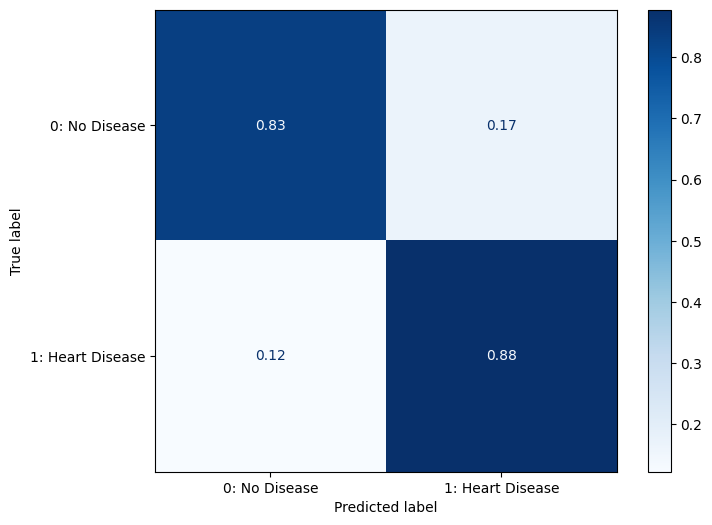

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,y_train)

gnb_prediction=Gnb.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(gnb_prediction,y_test)
print(accuracy)

print(classification_report(y_test,gnb_prediction.reshape(-1,1),target_names=target_names))

target_names = ['0: No Disease', '1: Heart Disease']
cm = confusion_matrix(y_test, gnb_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.8865546218487395
                  precision    recall  f1-score   support

   0: No Disease       0.84      0.92      0.88       107
1: Heart Disease       0.93      0.86      0.89       131

        accuracy                           0.89       238
       macro avg       0.89      0.89      0.89       238
    weighted avg       0.89      0.89      0.89       238



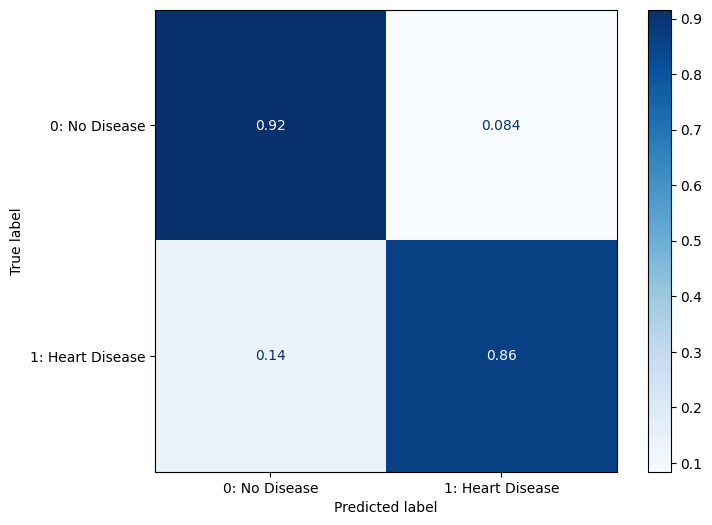

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',)
dt.fit(X_train,y_train)

dt_prediction=dt.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(dt_prediction,y_test)
print(accuracy)
target_names = ['0: No Disease', '1: Heart Disease']

print(classification_report(y_test,dt_prediction.reshape(-1,1),target_names=target_names))
cm = confusion_matrix(y_test, dt_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()


0.9537815126050421
                  precision    recall  f1-score   support

   0: No Disease       0.96      0.93      0.95       107
1: Heart Disease       0.95      0.97      0.96       131

        accuracy                           0.95       238
       macro avg       0.95      0.95      0.95       238
    weighted avg       0.95      0.95      0.95       238



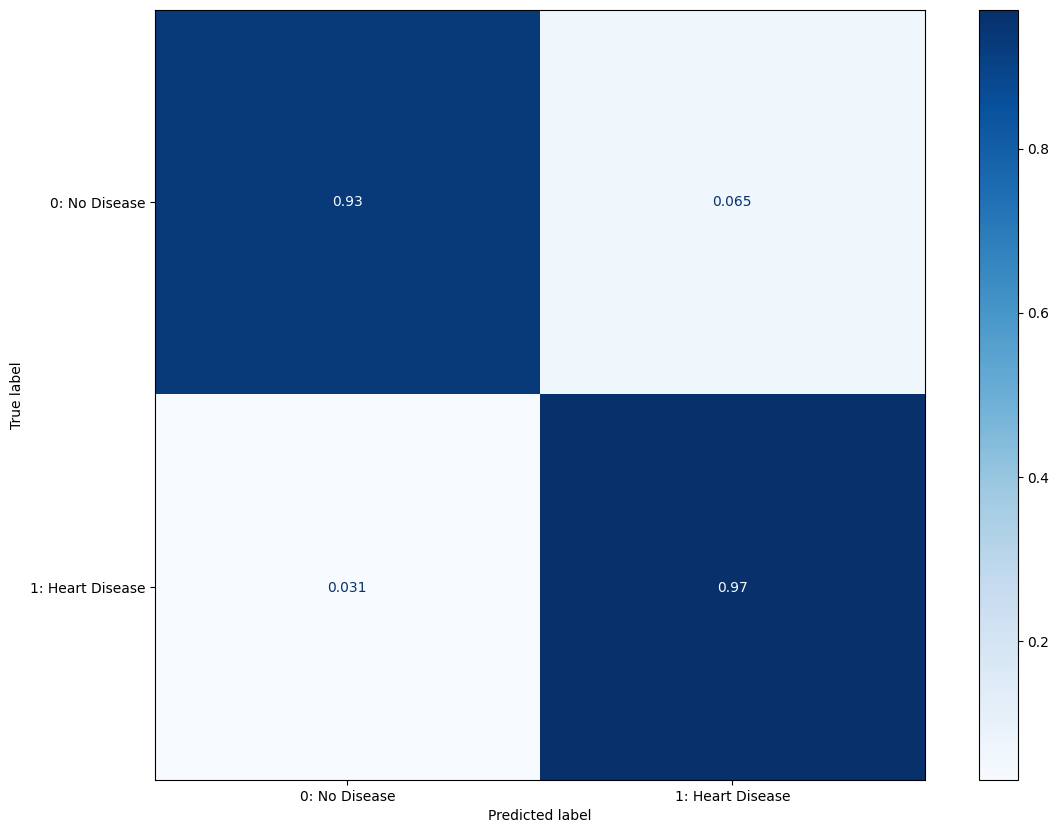

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,criterion='log_loss',max_features='log2',)
rf.fit(X_train,y_train)

rf_prediction=rf.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(rf_prediction,y_test)
print(accuracy)
target_names = ['0: No Disease', '1: Heart Disease']
print(classification_report(y_test,rf_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, rf_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(14,10))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.5840336134453782
                  precision    recall  f1-score   support

   0: No Disease       0.54      0.54      0.54       107
1: Heart Disease       0.62      0.62      0.62       131

        accuracy                           0.58       238
       macro avg       0.58      0.58      0.58       238
    weighted avg       0.58      0.58      0.58       238



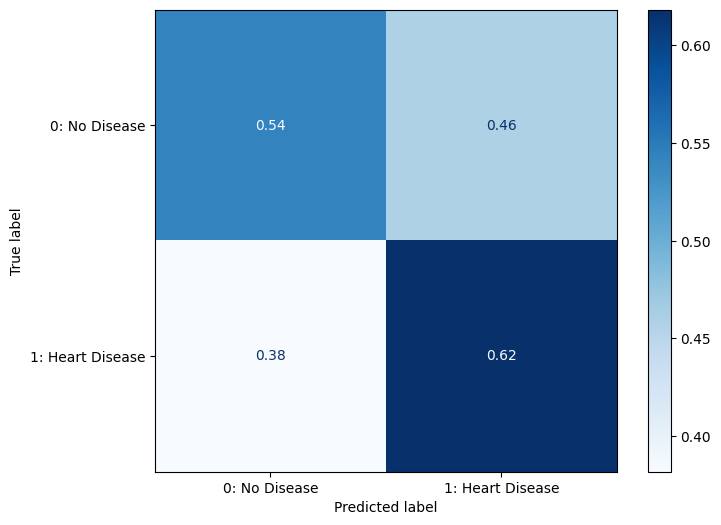

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
svm_prediction=svc.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(svm_prediction,y_test)
print(accuracy)

target_names = ['0: No Disease', '1: Heart Disease']
print(classification_report(y_test,svm_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, svm_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

0.7184873949579832
                  precision    recall  f1-score   support

   0: No Disease       0.68      0.71      0.69       107
1: Heart Disease       0.75      0.73      0.74       131

        accuracy                           0.72       238
       macro avg       0.72      0.72      0.72       238
    weighted avg       0.72      0.72      0.72       238



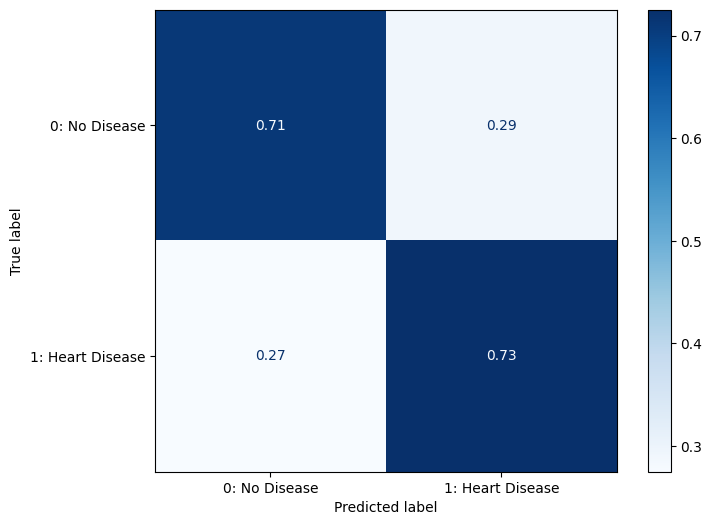

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_prediction=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(knn_prediction,y_test)
print(accuracy)


target_names = ['0: No Disease', '1: Heart Disease']
print(classification_report(y_test,knn_prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, knn_prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Replace the roc_curve lines with the following:

# Get the classification report
report = classification_report(y_test, svm_prediction, target_names = ['0: No Disease', '1: Heart Disease'])

# Print the classification report
print(report)

                  precision    recall  f1-score   support

   0: No Disease       0.54      0.54      0.54       107
1: Heart Disease       0.62      0.62      0.62       131

        accuracy                           0.58       238
       macro avg       0.58      0.58      0.58       238
    weighted avg       0.58      0.58      0.58       238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


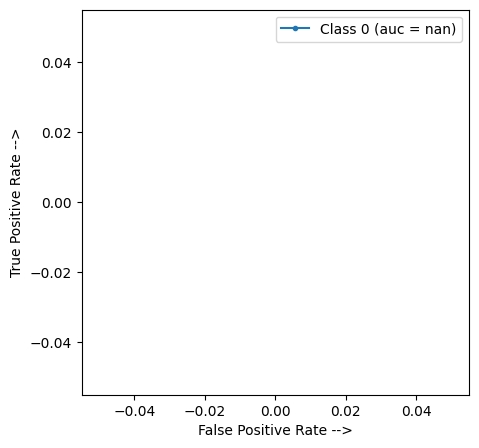

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['0: No Disease', '1: Heart Disease'])
lr_prediction_bin = label_binarize(lr_prediction, classes=['0: No Disease', '1: Heart Disease'])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_prediction_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(5, 5), dpi=100)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='Class %d (auc = %0.3f)' % (i, roc_auc[i]))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


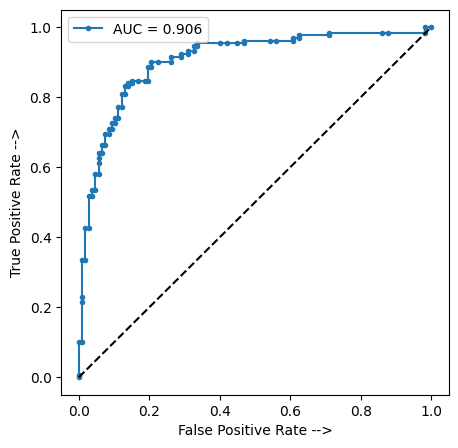

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get probability predictions from logistic regression model
lr_prediction_prob = lr.predict_proba(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, lr_prediction_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.5 MB/s eta 0:00:00


In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer`
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

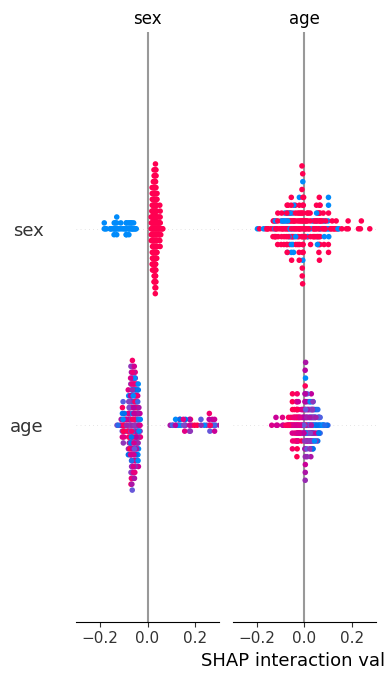

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

Variable Importance Plot - Global Interpretation


<Figure size 1000x800 with 0 Axes>

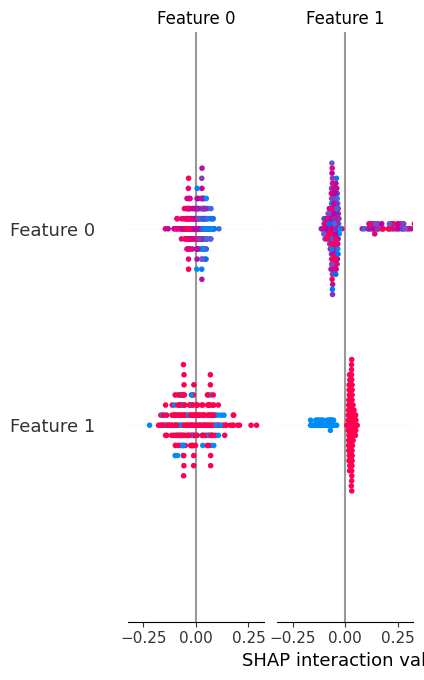

Feature Importance Plot


<Figure size 1000x800 with 0 Axes>

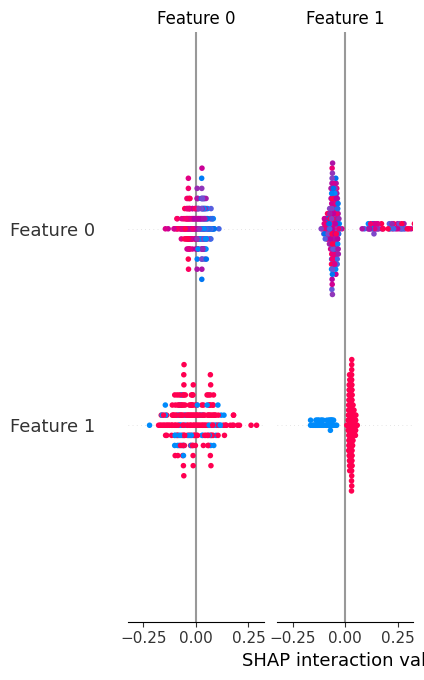

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Train Random Forest Classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# Ensure shap_values is a numpy array
shap_values = np.array(shap_values)

# Variable Importance Plot - Global Interpretation
print("Variable Importance Plot - Global Interpretation")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type='bar')

print("Feature Importance Plot")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)




[[[-0.03614407  0.03614407]
  [-0.02013646  0.02013646]
  [-0.10406965  0.10406965]
  ...
  [ 0.03637024 -0.03637024]
  [-0.01302036  0.01302036]
  [-0.13039413  0.13039413]]

 [[ 0.02826111 -0.02826111]
  [-0.03334055  0.03334055]
  [ 0.18204148 -0.18204148]
  ...
  [-0.10550223  0.10550223]
  [-0.02798342  0.02798342]
  [-0.15747841  0.15747841]]

 [[ 0.02933011 -0.02933011]
  [ 0.05302673 -0.05302673]
  [ 0.12336063 -0.12336063]
  ...
  [ 0.04096851 -0.04096851]
  [ 0.0462859  -0.0462859 ]
  [ 0.16423305 -0.16423305]]

 ...

 [[ 0.04043449 -0.04043449]
  [ 0.11410459 -0.11410459]
  [ 0.18949789 -0.18949789]
  ...
  [ 0.06830388 -0.06830388]
  [ 0.00395592 -0.00395592]
  [-0.12410405  0.12410405]]

 [[ 0.04082218 -0.04082218]
  [-0.02980245  0.02980245]
  [-0.11000804  0.11000804]
  ...
  [-0.07478612  0.07478612]
  [-0.09218573  0.09218573]
  [-0.1611529   0.1611529 ]]

 [[ 0.00248111 -0.00248111]
  [-0.03089322  0.03089322]
  [-0.12014076  0.12014076]
  ...
  [-0.09767315  0.097673

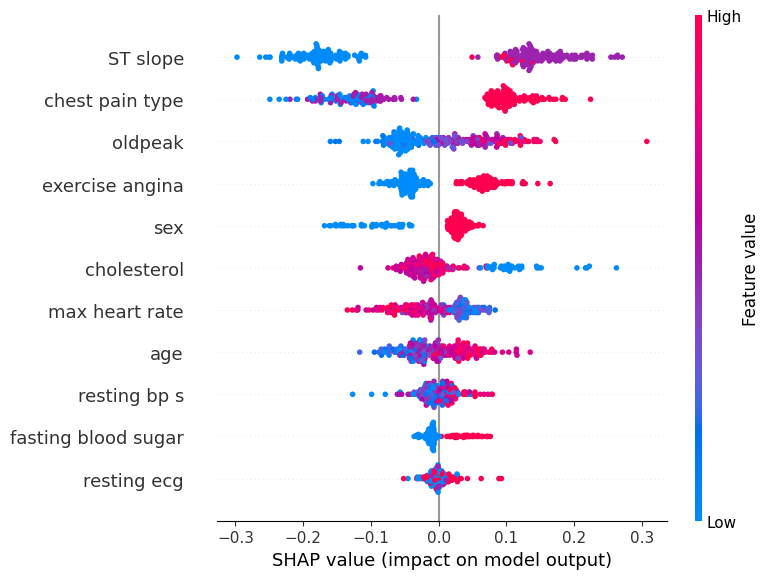

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer using the RandomForestClassifier model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)
print(shap_values)
print(shap_values.shape)
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is already calculated and has shape (238, 11, 2)
# Extract SHAP values for class 1 (positive class)
shap_values_class_1 = shap_values[:, :, 1]  # Taking the SHAP values for class 1

# Plot the SHAP summary plot for class 1 (positive class)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_class_1, X_test, plot_type="dot")
plt.show()






In [ ]:
!pip install LIME

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b65dcb85d4acfa1036c018cc4c6f51a011b9207c0e9a3e9af8d0bca6a7f0a575
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built LIME


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:51:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9285714285714286


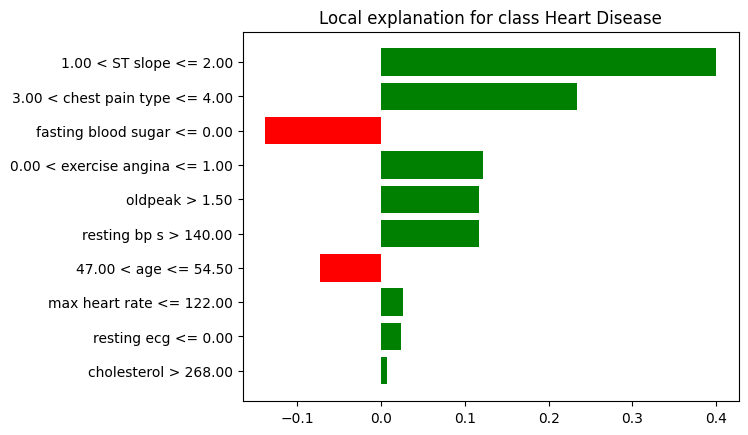

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt


# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Use LIME to explain a prediction
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    mode='classification'
)

# Pick a test instance to explain
i = 25  # Pick any instance index from X_test
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba)

# Show the explanation in a plot
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()

# For a standalone plot, you can save it
plt.savefig('lime_explanation.png')



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:53:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


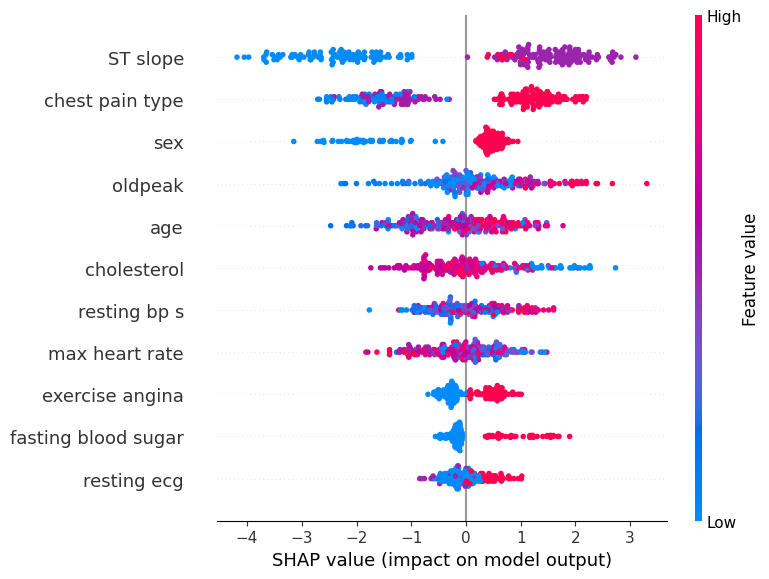

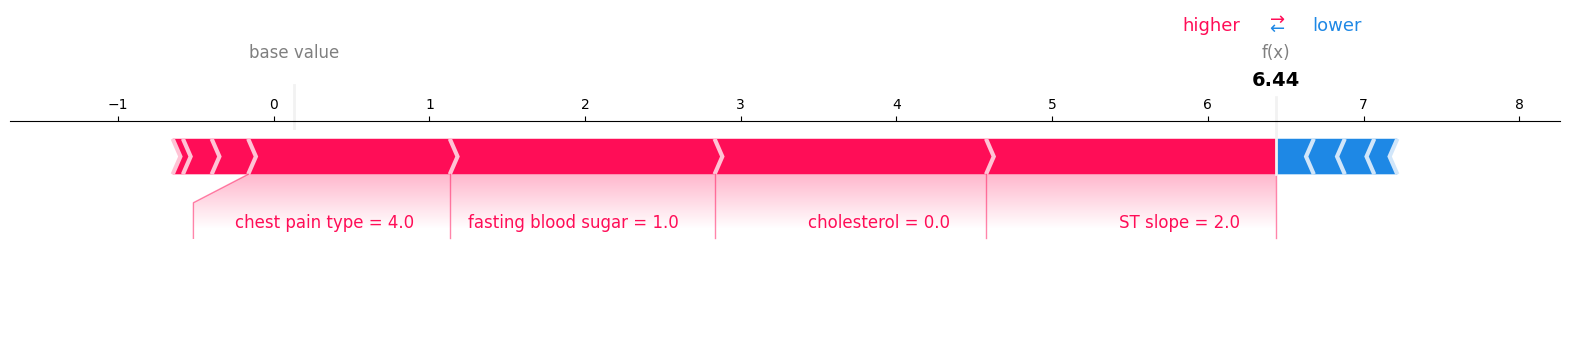

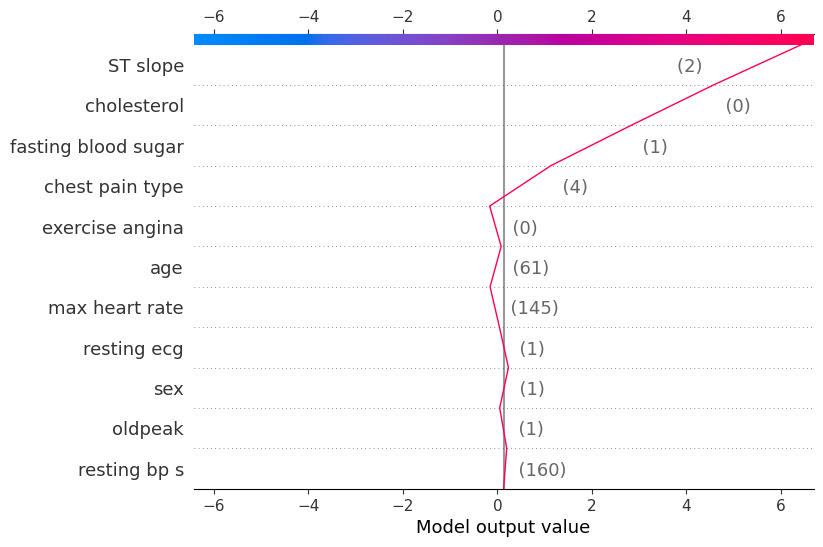

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt


# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Pick an instance to explain
instance_index = 0  # You can change this to any row index of interest in X_test

# Summary Plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force Plot (explanation for one prediction)
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :], matplotlib=True)

# Save the force plot to a file
plt.savefig('shap_force_plot.png')

# If you want to display the decision plot (similar to force plot but for more detailed steps)
shap.decision_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index, :])
plt.show()



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:55:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


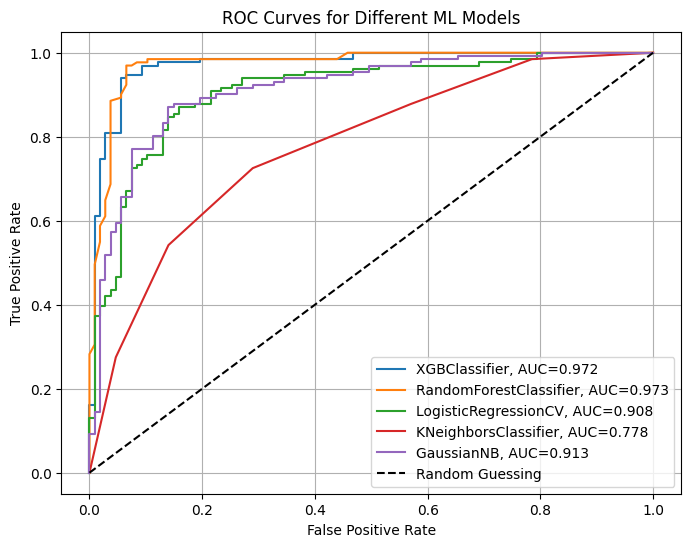

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import matplotlib.pyplot as plt


# Initialize classifiers
classifiers = {
    'XGBClassifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegressionCV': LogisticRegressionCV(cv=5, max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

# Initialize a plot
plt.figure(figsize=(8, 6))

# Loop through classifiers, fit them, compute ROC and AUC, and plot ROC curves
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train classifier
    if hasattr(clf, "predict_proba"):  # Check if the classifier has predict_proba
        y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:  # If no predict_proba, use decision_function (like SVMs) or predict
        y_pred_proba = clf.decision_function(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name}, AUC={auc:.3f}')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different ML Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()

